In [1]:
import pandas as pd

flights = pd.read_csv('./data/2008.csv')

data sources

* full 2008 dataset - see udacity
* flight delay cause https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?type=3&pn=1
* airport codes https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=288&DB_Short_Name=Aviation%20Support%20Tables

In [3]:
subset = flights.sample(frac=.1)

Questions

0. distribution of delay
1. is there a relationship between delay and security?
2. relative delay to flight time
3. relative delay to distance
4. patterns over time, e.g. day of week, month
5. is there a predictor of arrival delay
6. particular flights delayed
7. carrier delays

In [101]:
flights.columns

Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')

In [4]:
flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0


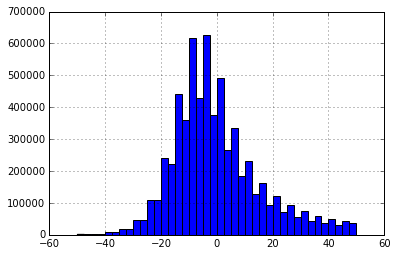

In [33]:
%matplotlib inline

flights[(flights.ArrDelay <= 50) & (flights.ArrDelay >= -50)].ArrDelay.hist(bins=40)

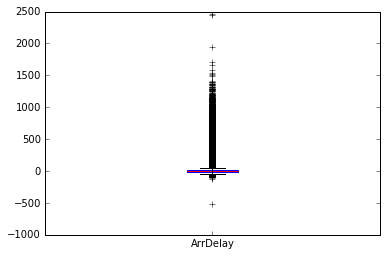

In [32]:
flights.ArrDelay.plot.box()

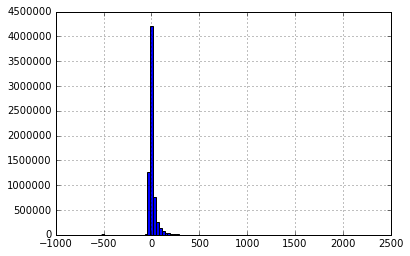

In [46]:
flights.ArrDelay.hist(bins=100)

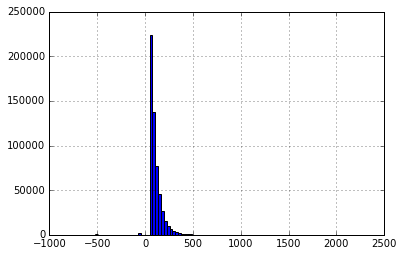

In [48]:
flights.query('abs(ArrDelay) > 50').ArrDelay.hist(bins=100)

In [62]:
bins = flights.ArrDelay.value_counts(bins=50, dropna=False).sort_index()
bins[bins > 0]
#flights.ArrDelay.hist(bins=50)

(-521.981, -459.4]          1
(-161.4, -101.8]            2
(-101.8, -42.2]          7937
(-42.2, 17.4]         5485809
(17.4, 77.0]          1034899
(77.0, 136.6]          208716
(136.6, 196.2]          72281
(196.2, 255.8]          26043
(255.8, 315.4]          10501
(315.4, 375.0]           4404
(375.0, 434.6]           1895
(434.6, 494.2]            913
(494.2, 553.8]            449
(553.8, 613.4]            288
(613.4, 673.0]            173
(673.0, 732.6]            122
(732.6, 792.2]            116
(792.2, 851.8]             99
(851.8, 911.4]             99
(911.4, 971.0]             62
(971.0, 1030.6]            67
(1030.6, 1090.2]           37
(1090.2, 1149.8]           43
(1149.8, 1209.4]           23
(1209.4, 1269.0]           14
(1269.0, 1328.6]           13
(1328.6, 1388.2]            9
(1388.2, 1447.8]            4
(1447.8, 1507.4]            1
(1507.4, 1567.0]            3
(1567.0, 1626.6]            1
(1626.6, 1686.2]            1
(1686.2, 1745.8]            1
(1924.6, 1

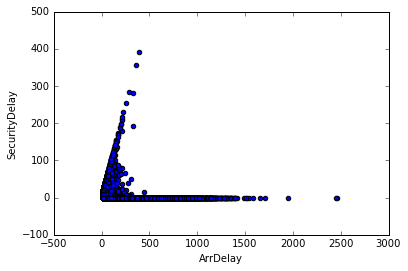

In [64]:
flights.plot.scatter('ArrDelay', 'SecurityDelay')

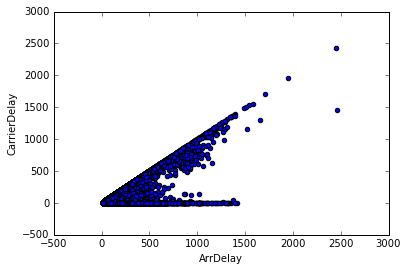

In [65]:
flights.plot.scatter('ArrDelay', 'CarrierDelay')

UniqueCarrier
9E    Axes(0.125,0.125;0.775x0.775)
AA    Axes(0.125,0.125;0.775x0.775)
AQ    Axes(0.125,0.125;0.775x0.775)
AS    Axes(0.125,0.125;0.775x0.775)
B6    Axes(0.125,0.125;0.775x0.775)
CO    Axes(0.125,0.125;0.775x0.775)
DL    Axes(0.125,0.125;0.775x0.775)
EV    Axes(0.125,0.125;0.775x0.775)
F9    Axes(0.125,0.125;0.775x0.775)
FL    Axes(0.125,0.125;0.775x0.775)
HA    Axes(0.125,0.125;0.775x0.775)
MQ    Axes(0.125,0.125;0.775x0.775)
NW    Axes(0.125,0.125;0.775x0.775)
OH    Axes(0.125,0.125;0.775x0.775)
OO    Axes(0.125,0.125;0.775x0.775)
UA    Axes(0.125,0.125;0.775x0.775)
US    Axes(0.125,0.125;0.775x0.775)
WN    Axes(0.125,0.125;0.775x0.775)
XE    Axes(0.125,0.125;0.775x0.775)
YV    Axes(0.125,0.125;0.775x0.775)
Name: ArrDelay, dtype: object

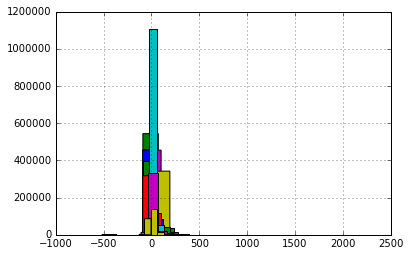

In [72]:
flights.groupby('UniqueCarrier').ArrDelay.hist()

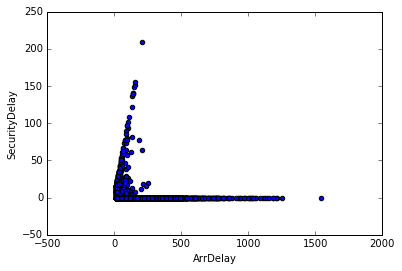

In [78]:
subset.plot.scatter('ArrDelay', 'SecurityDelay')

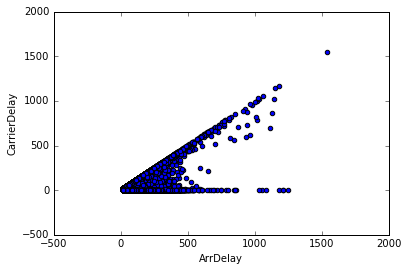

In [79]:
subset.plot.scatter('ArrDelay', 'CarrierDelay')

In [91]:
bins = subset.ArrDelay.value_counts(bins=50, dropna=False).sort_index()
#bins = bins[bins > 0].apply(lambda v: v * 1.0 / sum(bins)) * 100
bins * 10

(-521.062, -477.78]         10
(-477.78, -436.56]           0
(-436.56, -395.34]           0
(-395.34, -354.12]           0
(-354.12, -312.9]            0
(-312.9, -271.68]            0
(-271.68, -230.46]           0
(-230.46, -189.24]           0
(-189.24, -148.02]           0
(-148.02, -106.8]            0
(-106.8, -65.58]           110
(-65.58, -24.36]        190320
(-24.36, 16.86]        5248530
(16.86, 58.08]          942630
(58.08, 99.3]           253830
(99.3, 140.52]          108330
(140.52, 181.74]         53210
(181.74, 222.96]         26470
(222.96, 264.18]         13240
(264.18, 305.4]           6900
(305.4, 346.62]           3580
(346.62, 387.84]          2370
(387.84, 429.06]          1230
(429.06, 470.28]           850
(470.28, 511.5]            480
(511.5, 552.72]            330
(552.72, 593.94]           170
(593.94, 635.16]           190
(635.16, 676.38]           140
(676.38, 717.6]             90
(717.6, 758.82]            110
(758.82, 800.04]            90
(800.04,

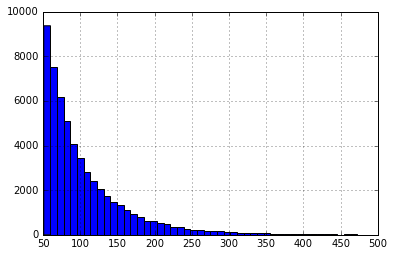

In [100]:
subset.query('50 < ArrDelay < 500').ArrDelay.hist(bins=50)

In [4]:
subset.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2469422,2008,5,27,2,744.0,740,856.0,850,WN,2338,...,5.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1544008,2008,3,15,6,1159.0,1154,1411.0,1343,FL,826,...,12.0,10.0,0,NaN,0,0.0,5.0,23.0,0.0,0.0
3071384,2008,6,25,3,1752.0,1755,1829.0,1840,WN,3137,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5860240,2008,10,31,5,1207.0,1210,1309.0,1310,AA,1672,...,4.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2151657,2008,4,19,6,1726.0,1706,1945.0,1935,FL,451,...,6.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [50]:
import numpy as np

def quantile(q):
    # quantile for dataframe.agg
    def calc(s):
        s = s.quantile(q)
        return s
    calc.__name__ = str(q)
    return calc

agg_describe = ['mean', 'std', 'min', 
                quantile(.25), quantile(.5), 
                quantile(.75), quantile(.95), 
                'max', len]

def group_describe(self, groupby=None, **kwargs):
    # drop in replacement for pd.DataFrame.describe with groupby support
    if groupby:
        return self.groupby(groupby).agg(agg_describe)
    return self._describe()

if not hasattr(pd.DataFrame, '_describe'):
    pd.DataFrame._describe = pd.DataFrame.describe
pd.DataFrame.describe = group_describe



subset.describe(['UniqueCarrier', 'Origin', 'Dest']).ArrDelay.sort_values('mean')

mean        std   min   0.25   0.5   0.75  \
UniqueCarrier Origin Dest                                                   
B6            JFK    BNA  -42.000000        NaN -42.0 -42.00 -42.0 -42.00   
OH            SRQ    TPA  -37.000000        NaN -37.0 -37.00 -37.0 -37.00   
AQ            SNA    KOA  -36.500000  28.207564 -68.0 -56.00 -35.0 -15.50   
OO            ORD    GTF  -35.000000        NaN -35.0 -35.00 -35.0 -35.00   
AS            OGG    ANC  -32.000000   9.539392 -43.0 -35.00 -27.0 -26.50   
9E            LGA    MSY  -31.000000   4.242641 -34.0 -32.50 -31.0 -29.50   
AQ            SAN    OGG  -30.500000   9.192388 -37.0 -33.75 -30.5 -27.25   
              OAK    HNL  -30.125000  23.191362 -56.0 -48.50 -31.5 -16.75   
FL            RSW    CMH  -28.666667  21.361960 -53.0 -36.50 -20.0 -16.50   
DL            ATL    MTJ  -28.000000   1.414214 -29.0 -28.50 -28.0 -27.50   
US            DCA    SRQ  -28.000000        NaN -28.0 -28.00 -28.0 -28.00   
AQ            OAK    OGG  -27.571429  26.525819 -68.0 -45.50 -22.0  -7.50   
EV            PWM    CVG  -27.000000        NaN -27.0 -27.00 -27.0 -27.00   
AA            LGA    EGE  -27.000000  21.633308 -45.0 -39.00 -33.0 -18.00   
CO            EWR    SAV  -26.500000   6.363961 -31.0 -28.75 -26.5 -24.25   
NW            MEM    SDF  -26.000000        NaN -26.0 -26.00 -26.0 -26.00   
XE            DAB    CLE  -26.000000        NaN -26.0 -26.00 -26.0 -26.00   
EV            LGA    JAX  -26.000000        NaN -26.0 -26.00 -26.0 -26.00   
AQ            SMF    OGG  -25.333333  19.376962 -39.0 -36.25 -31.0 -27.25   
OH            ATL    MEM  -25.000000        NaN -25.0 -25.00 -25.0 -25.00   
              FSD    MSP  -25.000000        NaN -25.0 -25.00 -25.0 -25.00   
EV            MCO    TYS  -24.700000   5.638164 -34.0 -28.75 -23.5 -20.50   
YV            SAN    PHX  -24.333333   6.658328 -32.0 -26.50 -21.0 -20.50   
FL            MCO    MDT  -24.333333   2.516611 -27.0 -25.50 -24.0 -23.00   
OH            RDU    FLL  -23.000000        NaN -23.0 -23.00 -23.0 -23.00   
OO            RNO    BUR  -23.000000        NaN -23.0 -23.00 -23.0 -23.00   
FL            MCO    PWM  -22.846154   9.379465 -38.0 -30.00 -25.0 -16.00   
WN            OAK    TUS  -22.571429  13.496560 -39.0 -32.00 -26.0 -17.00   
              OKC    MCO  -22.000000   8.485281 -28.0 -25.00 -22.0 -19.00   
              RNO    ONT  -22.000000   7.071068 -27.0 -24.50 -22.0 -19.50   
...                              ...        ...   ...    ...   ...    ...   
OO            DEN    ORD         NaN        NaN   NaN    NaN   NaN    NaN   
                     PIH         NaN        NaN   NaN    NaN   NaN    NaN   
                     SDF         NaN        NaN   NaN    NaN   NaN    NaN   
              DFW    SGF         NaN        NaN   NaN    NaN   NaN    NaN   
              DSM    LNK         NaN        NaN   NaN    NaN   NaN    NaN   
              FAT    OGD         NaN        NaN   NaN    NaN   NaN    NaN   
                     ONT         NaN        NaN   NaN    NaN   NaN    NaN   
              FCA    IDA         NaN        NaN   NaN    NaN   NaN    NaN   
              GEG    BLI         NaN        NaN   NaN    NaN   NaN    NaN   
              LAX    DEN         NaN        NaN   NaN    NaN   NaN    NaN   
                     GJT         NaN        NaN   NaN    NaN   NaN    NaN   
                     SFO         NaN        NaN   NaN    NaN   NaN    NaN   
              LNK    LAN         NaN        NaN   NaN    NaN   NaN    NaN   
              MEM    XNA         NaN        NaN   NaN    NaN   NaN    NaN   
              ORD    ALB         NaN        NaN   NaN    NaN   NaN    NaN   
                     DEN         NaN        NaN   NaN    NaN   NaN    NaN   
                     GJT         NaN        NaN   NaN    NaN   NaN    NaN   
              PHL    ATW         NaN        NaN   NaN    NaN   NaN    NaN   
              PSP    FAT         NaN        NaN   NaN    NaN   NaN    NaN   
                     GJT    

In [55]:
subset.describe('UniqueCarrier').ArrDelay.sort_values('mean')

,mean,std,min,0.25,0.5,0.75,0.95,max,len
UniqueCarrier,,,,,,,,,
AQ,-3.627845,15.192798,-68.0,-8.0,-4.0,0.0,13.00,170.0,752.0
HA,1.336846,30.712946,-519.0,-7.0,-3.0,2.0,25.00,855.0,6229.0
US,2.682303,32.376975,-69.0,-14.0,-5.0,8.0,56.00,749.0,45498.0
9E,4.023378,36.249749,-59.0,-13.0,-5.0,7.0,64.65,910.0,26254.0
AS,4.415820,34.463894,-59.0,-12.0,-3.0,10.0,55.00,801.0,15229.0
WN,5.233918,30.766978,-87.0,-9.0,-3.0,8.0,58.00,563.0,120418.0
F9,6.012153,27.369339,-38.0,-8.0,0.0,11.0,48.00,750.0,9494.0
OO,6.742938,35.721112,-49.0,-10.0,-3.0,9.0,74.00,593.0,57040.0
NW,7.696685,44.298348,-50.0,-10.0,-1.0,13.0,61.00,1542.0,34646.0


In [64]:
subset.groupby(['Origin', 'Dest']).ArrDelay.agg(agg_describe)

mean         std   min   0.25   0.5   0.75    0.95     max  \
Origin Dest                                                                    
ABE    ATL   12.697368   56.052123 -24.0 -11.00   0.5  14.00   75.75   409.0   
       BHM   -3.000000         NaN  -3.0  -3.00  -3.0  -3.00   -3.00    -3.0   
       CLE    5.285714   27.565018 -22.0  -8.00  -2.0   6.00   54.75   143.0   
       CLT   -4.081081   16.907228 -30.0 -14.00  -6.0   2.00   24.60    58.0   
       CVG   -7.280000   11.717224 -28.0 -16.00  -8.0  -2.00   11.80    25.0   
       DTW    4.470000   43.848098 -39.0 -13.00  -5.5   7.00   47.75   350.0   
       ORD   22.550847   73.520111 -36.0 -16.75  -3.0  19.75  214.15   309.0   
ABI    DFW    4.041985   36.615457 -24.0 -11.00  -6.0   2.00   52.90   286.0   
ABQ    AMA    7.756098   22.194347 -15.0  -6.00   1.0  16.00   48.00   104.0   
       ATL    7.660000   52.350262 -27.0 -14.00  -6.0   6.00   78.60   310.0   
       AUS    2.575758   33.541980 -23.0 -14.00  -6.0   4.00   34.00   171.0   
       BWI    3.666667   42.394820 -31.0 -13.75  -5.5  -1.00   82.35   236.0   
       CLE  -20.666667    7.571878 -26.0 -25.00 -24.0 -18.00  -13.20   -12.0   
       CVG   -3.548387   15.342400 -29.0 -14.50  -6.0   4.50   21.00    43.0   
       DAL    3.332168   20.315532 -22.0  -8.00  -3.0   7.00   44.75   117.0   
       DEN    3.306792   26.439710 -25.0 -10.00  -3.0   6.00   49.70   160.0   
       DFW    5.201465   34.564407 -24.0 -11.00  -4.0   7.00   61.80   357.0   
       ELP    4.901235   19.079180 -18.0  -5.00   0.0   6.00   34.00   117.0   
       EWR    9.153846   33.193489 -27.0 -13.00   2.0  20.00   68.40    78.0   
       HOU   -0.238532   29.326040 -24.0 -12.00  -7.0   1.00   32.40   209.0   
       IAD   -9.125000   22.394916 -39.0 -22.25 -17.0  -3.00   40.75    59.0   
       IAH    9.620690   47.570891 -26.0  -8.25  -2.0   8.00   68.65   403.0   
       LAS    5.152466   28.693222 -22.0  -8.00  -2.0   7.00   51.90   291.0   
       LAX    7.845188   34.413408 -31.0 -11.00  -4.0  14.50   61.40   223.0   
       LBB    0.864865   11.709830 -14.0  -5.00  -4.0   4.00   23.80    40.0   
       MAF    6.892857   22.572253 -13.0  -5.25   2.0  11.75   30.45   104.0   
       MCI    8.000000   42.071745 -18.0  -9.00  -3.0   6.25   53.20   280.0   
       MCO   -1.779221   15.136765 -25.0 -12.00  -3.0   3.00   22.00    66.0   
       MDW   -1.605263   32.602691 -27.0 -13.25  -7.0  -1.00   19.75   234.0   
       MSP   -0.610169   15.781937 -23.0 -11.50  -4.0   8.50   21.80    67.0   
...                ...         ...   ...    ...   ...    ...     ...     ...   
VPS    IAH    7.956522   27.937992 -25.0 -11.00   1.5  13.75   76.25    97.0   
       MEM    0.539216   46.399614 -30.0 -15.00  -7.0   1.00   35.00   414.0   
       ORD   51.909091  236.813661 -28.0 -10.00   0.0  19.00  104.40  1357.0   
WRG    KTN    0.657895   34.872181 -26.0 -16.50 -10.5   6.00   39.65   179.0   
       PSG    6.432432   52.245968 -33.0 -17.00 -10.0  12.00   62.00   276.0   
WYS    SLC  -11.920000    8.376157 -23.0 -18.00 -14.0 -11.00    5.20    10.0   
XNA    ATL   10.210811   56.320452 -31.0  -9.00  -3.0  11.00   65.40   640.0   
       CVG   -8.538462    8.181436 -27.0 -12.00  -8.0  -2.00    1.60     4.0   
       DCA    0.481481   25.034392 -28.0 -16.00  -8.0  15.00   40.20    88.0   
       DEN    5.732394   25.836827 -29.0  -7.00   0.0  10.00   33.50   164.0   
       DFW    7.063604   27.976615 -25.0  -7.50   0.0  11.00   57.70   219.0   
       DTW   -2.325000   23.330829 -36.0 -17.00  -5.0   5.00   31.25    81.0   
       EWR   27.269841   57.791953 -40.0 -13.00   5.0  43.50  134.80   213.0   
       IAH   11.838235   43.376427 -26.0 -10.00  -1.5  13.25  104.25   216.0   
       LAX    6.653846   42.889572 -22.0 -14.00  -6.5   6.25   51.00   194.0   
       LGA    4.758065   38.621189 -49.0 -18.75  -2.0  15.00   65.50   158.0   
       MEM    8.304762   38.437543 -29.0 -11.00  -2.0   9.00   77.00   246.0   
       MIA   23.00

In [65]:
subset.groupby(['Dest', 'Origin']).ArrDelay.agg(agg_describe)

mean         std   min   0.25   0.5   0.75    0.95    max  \
Dest Origin                                                                   
ABE  ATL     13.097561   43.981649 -25.0 -11.00  -1.5  13.50   97.60  203.0   
     CLE      1.078947   24.250231 -23.0 -11.00  -5.0   2.50   35.00  124.0   
     CLT      8.425000   29.078927 -25.0  -6.50   5.0  14.25   46.35  132.0   
     CVG     -2.600000   20.832005 -33.0 -13.00  -8.5   2.50   41.55   64.0   
     DTW      5.815217   39.542140 -27.0 -14.00  -6.0   4.25   99.80  182.0   
     ORD     18.038168   48.707669 -24.0  -8.50  -1.0  27.50  138.00  246.0   
ABI  DFW      9.904167   36.724053 -26.0  -7.00  -1.0  10.25   68.35  292.0   
ABQ  AMA      0.095238   30.046963 -16.0  -7.75  -5.0  -1.25    4.95  187.0   
     ATL     13.336364   36.845145 -22.0  -5.00   2.0  15.00   91.10  213.0   
     AUS      6.585366   24.348486 -21.0  -9.00  -2.0  15.00   33.00   97.0   
     BWI      0.584906   24.954909 -31.0 -21.00   0.0  17.00   43.80   69.0   
     CLE    -15.000000         NaN -15.0 -15.00 -15.0 -15.00  -15.00  -15.0   
     CVG      8.529412   31.980330 -29.0  -6.75  -1.5   8.75   78.10  130.0   
     DAL      7.529052   34.599438 -23.0  -7.00  -2.0  10.00   50.00  333.0   
     DEN      5.777778   30.012203 -31.0 -10.00  -2.0   8.00   65.00  246.0   
     DFW     12.489437   31.702959 -20.0  -5.00   4.0  17.25   75.95  194.0   
     ELP      0.012346   16.236143 -15.0  -9.00  -4.0   0.00   50.00   62.0   
     EWR     30.222222   47.811586 -33.0  -1.50  11.5  69.50  107.30  126.0   
     HOU     11.169811   31.781538 -22.0  -9.00   1.0  16.75   92.75  152.0   
     IAD     11.260870   42.976968 -30.0  -5.00   4.0  11.50   79.50  177.0   
     IAH      9.659574   33.482280 -25.0  -5.00   1.0  13.00   58.00  339.0   
     LAS      6.873984   29.795568 -25.0  -9.00  -2.0  10.75   55.75  225.0   
     LAX      1.954167   19.406734 -26.0  -9.00  -3.0   5.00   34.15  108.0   
     LBB     14.090909   38.896789 -11.0  -5.00   1.0  18.00   55.80  204.0   
     MAF      0.885714   19.291527 -17.0  -8.50  -3.0   1.00   24.80   95.0   
     MCI      6.650794   47.344025 -28.0 -11.50  -4.0   5.50   34.70  296.0   
     MCO     -0.609375   25.413168 -34.0 -14.50  -8.5   8.25   39.80  117.0   
     MDW      2.364865   37.178052 -32.0 -17.00  -6.0   4.00   62.30  170.0   
     MSP      6.907407   78.148931 -30.0 -12.00  -4.5   7.50   20.70  562.0   
     OAK      2.051546   22.149761 -22.0 -11.00  -6.0   4.00   55.00  122.0   
...                ...         ...   ...    ...   ...    ...     ...    ...   
VPS  IAH      7.923077   44.891322 -25.0 -12.50  -7.0   2.00   87.50  203.0   
     MEM      3.128440   19.996343 -30.0  -8.00  -1.0   8.00   31.60  114.0   
     ORD     -6.681818    9.828948 -21.0 -15.00  -6.0  -2.50   10.90   12.0   
WRG  KTN     11.194444   31.142823 -22.0  -8.50   4.0  18.00   63.25  131.0   
     PSG      0.243243   18.567303 -31.0 -15.00  -1.0  11.00   34.80   40.0   
WYS  SLC     -9.240000   17.431485 -27.0 -19.00 -12.0  -8.00   21.60   57.0   
XNA  ATL      8.825000   27.818406 -29.0  -8.25   1.0  15.25   71.40  124.0   
     ATW           NaN         NaN   NaN    NaN   NaN    NaN     NaN    NaN   
     CVG     -4.750000   18.921489 -26.0 -18.75 -10.0   1.75   27.85   35.0   
     DCA     40.611111   59.848966 -16.0   3.00  19.0  29.00  176.80  187.0   
     DEN      1.890625   20.280663 -24.0 -11.25  -4.0   5.25   45.85   73.0   
     DFW     10.429066   34.804952 -19.0  -8.00  -1.0  12.00   69.60  220.0   
     DTW      1.833333   13.882914 -21.0  -5.00  -1.5  10.75   23.65   33.0   
     EWR     17.369565   47.429648 -33.0 -14.00   3.5  26.50  134.50  189.0   
     IAH      6.139073   29.959315 -23.0  -9.00  -2.0   7.00   43.50  185.0   
     LAX     38.413793  162.567902 -19.0 -10.00   3.0  15.00   64.80  875.0   
     LGA      8.253165   37.429752 -49.0 -18.50   0.0  24.00   64.00  177.0   
     MEM      5.009901   39.865899 -27.0 -13.00  -7.0   4.00   89.00